In [6]:

from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import tensorflow as tf

df = pd.read_csv('session_embeddings.csv')
xc = [col for col in df.columns if str(col)[-1]=='x']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.item_id)
df['labels'] = le.transform(df.item_id)

targets = tf.keras.utils.to_categorical(df.labels)


x_train,x_test,y_train,y_test = train_test_split(df[xc],targets,test_size=0.3)






In [7]:
df

,Unnamed: 0,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,66_x,67_x,68_x,69_x,70_x,71_x,72_x,73_x,item_id,labels
0,0,0,0,0,1,0,1,1,0,0,...,0,0,1,1,0,0,1,0,18626,279
1,1,0,0,0,3,0,0,3,0,0,...,0,0,3,3,0,0,3,3,23502,365
2,2,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,1,27613,430
3,3,0,0,0,1,0,1,1,0,0,...,0,0,1,1,0,0,1,1,7096,100
4,4,0,0,0,2,0,0,2,0,0,...,0,0,2,2,0,0,2,2,1368,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216067,216067,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,1,8060,120
216068,216068,0,0,1,1,1,0,1,0,0,...,0,0,1,1,0,0,1,1,12845,184
216069,216069,0,0,1,1,1,0,1,0,0,...,0,0,1,1,0,0,1,1,639,7
216070,216070,0,0,0,6,0,0,6,0,0,...,0,0,6,6,0,0,6,6,2915,50


In [9]:
from keras import backend as K
import tensorflow as tf

from keras.layers import Dense,Dropout
model = keras.Sequential()
model.add(Dense(1800,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(1800,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1500,activation='relu'))
model.add(Dense(800,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(400,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',
                                                                        tf.keras.metrics.TopKCategoricalAccuracy(k=50)])
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
4727/4727 [==============================] - 34s 7ms/step - loss: 5.1340 - accuracy: 0.0627 - top_k_categorical_accuracy: 0.5654
Epoch 2/20
4727/4727 [==============================] - 24s 5ms/step - loss: 4.9138 - accuracy: 0.0714 - top_k_categorical_accuracy: 0.6244
Epoch 3/20
4727/4727 [==============================] - 24s 5ms/step - loss: 4.8535 - accuracy: 0.0751 - top_k_categorical_accuracy: 0.6360
Epoch 4/20
4727/4727 [==============================] - 25s 5ms/step - loss: 4.8222 - accuracy: 0.0764 - top_k_categorical_accuracy: 0.6433
Epoch 5/20
4727/4727 [==============================] - 24s 5ms/step - loss: 4.8012 - accuracy: 0.0780 - top_k_categorical_accuracy: 0.6455
Epoch 6/20
4727/4727 [==============================] - 24s 5ms/step - loss: 4.7863 - accuracy: 0.0793 - top_k_categorical_accuracy: 0.6492
Epoch 7/20
4727/4727 [==============================] - 24s 5ms/step - loss: 4.7804 - accuracy: 0.0793 - top_k_categorical_accuracy: 0.6507
Epoch 8/20
4727/4727

In [10]:
model.evaluate(x_test,y_test)

2026/2026 [==============================] - 7s 3ms/step - loss: 4.8768 - accuracy: 0.0810 - top_k_categorical_accuracy: 0.6441


[4.876777172088623, 0.08097559213638306, 0.6441331505775452]

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1800)              133200    
                                                                 
 dense_8 (Dense)             (None, 1800)              3241800   
                                                                 
 dropout_3 (Dropout)         (None, 1800)              0         
                                                                 
 dense_9 (Dense)             (None, 1500)              2701500   
                                                                 
 dropout_4 (Dropout)         (None, 1500)              0         
                                                                 
 dense_10 (Dense)            (None, 1500)              2251500   
                                                                 
 dense_11 (Dense)            (None, 800)              

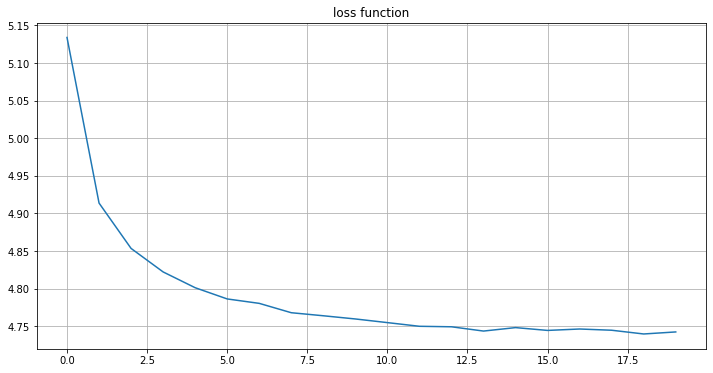

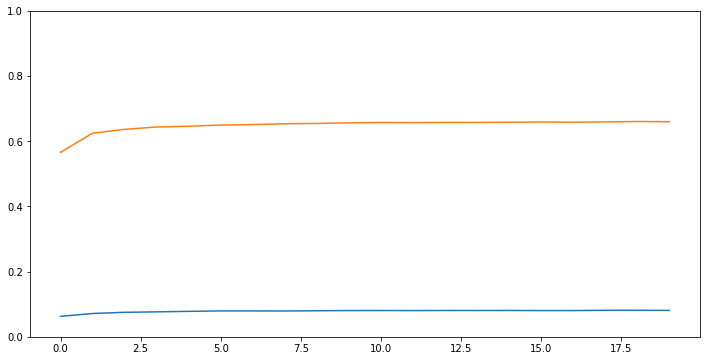

In [12]:
hist_ = pd.DataFrame(history.history)
hist_

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title('loss function')
plt.plot(hist_.index,hist_.loss)
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
plt.plot(hist_.index,hist_.accuracy)
plt.plot(hist_.index,hist_.top_k_categorical_accuracy)
plt.ylim(0,1)
plt.show()

(0.0, 1.0)

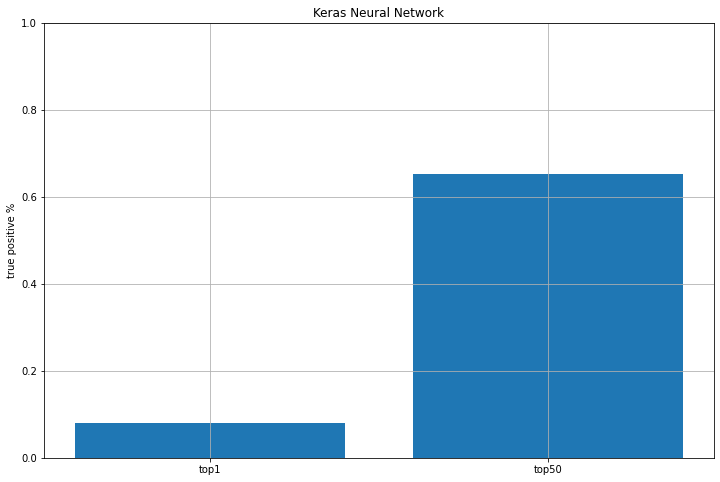

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Keras Neural Network')
plt.bar('top1',hist_.accuracy[:-1],color='tab:blue')
plt.bar('top50',hist_.top_k_categorical_accuracy[:-1],color='tab:blue')
plt.grid()
plt.ylabel('true positive %')
plt.ylim(0,1)

,item_id,season
0,26,fall
1,33,winter
2,93,winter
3,107,spring
4,112,spring
...,...,...
925,27929,fall
926,28004,spring
927,28051,fall
928,28055,spring


In [116]:
item_embeddings = pd.get_dummies(item_features.feature_category_id)
item_embeddings = pd.concat([item_features,item_embeddings],axis=1)
item_embeddings.drop(['feature_category_id','feature_value_id'],axis=1,inplace=True)
item_embeddings

,item_id,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471746,28143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
471747,28143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471748,28143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471749,28143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:

def category_to_item_id(category):
    return le.inverse_transform([category])[0]

def assign_season(month):
    seasons = {
    
    'winter':[11,12,1],
    'spring':[2,3,4],
    'summer':[5,6,7],
    'fall':[8,9,10]
    }
    for k,v in seasons.items():
        if month in seasons[k]:
            return k

def predict_items(session_data,item_embeddings,model,seasonality):
  current_season = pd.to_datetime(session_data.date)
  current_season = current_season.dt.month.values[0]
  current_season = assign_season(current_season)
  
  session_data = session_data.merge(item_embeddings,on='item_id')
  session_data = session_data.groupby('session_id').sum()
  session_data = session_data[item_embeddings.columns[1:]]
  
  predictions =  model.predict([session_data])
  probas = pd.DataFrame(predictions).T.reset_index()\
                                      .rename(columns={0:'proba','index':'id'})\
                                      .sort_values(by='proba',ascending=False)
  probas['item_id'] =  probas.id.apply(lambda x: category_to_item_id(x))
  probas = probas.merge(seasonality[['item_id','season']])
  return probas
  # return probas[probas.season==current_season].sort_values(by='proba',ascending=False)
  


import keras
counter = 0
counter50=0
for sid_ in purchases_.session_id.unique():
  ssid = sid_
  session_ = sessions_[sessions_.session_id==ssid]

  predictions = predict_items(session_,item_embeddings,model,seasonality)
  # print(predictions)
  y_true = purchases_[purchases_.session_id==ssid]['item_id'].values[0]
  # print(predictions.shape)
  if y_true in predictions.item_id.tolist()[:1]:
    counter +=1

  if y_true in predictions.item_id.tolist()[:50]:
    counter50 +=1

print('counter1',counter,len(purchases_.session_id.unique()))
print('coutner50',counter50,len(purchases_.session_id.unique()))

counter1 68 1000
coutner50 490 1000
